In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
#function to calculat h_new
@jit
def h_new(h, node, i, j, qx, qy, K, delt_x, delt_y):
    if node [i,j] == 0: #interior node
        h_n = (h[i-1,j])*(2*K[i+1,j]/(K[i+1,j])*K[i-1,j]) + (h[i+1,j])*(2*K[i-1,j]/(K[i+1,j]*K[i-1,j])) + (h[i,j-1])*(2*K[i,j+1]/(K[i,j+1]*K[i,j-1])) + (h[i,j+1])*(2*K[i,j-1]/(K[i,j+1]*K[i,j-1]))/4
    elif node [i,j] == 1: #dirichlet node
        h_n = h[i,j]
    elif node [i,j] == 21: #no flux left
        h_n = (2*(h[i+1,j] + (delt_x*qx[i,j])/K[i,j]) + h[i,j+1])/4
    elif node [i,j] == 22: #no flux right
        h_n = (2*(h[i-1,j] - (delt_x*qx[i,j])/K[i,j]) + h[i,j-1] + h[i,j+1])/4
    elif node [i,j] == 23: #no flux bottom
        h_n = (h[i-1,j] + h[i+1,j] + 2*(h[i,j-1] + (delt_y*qy[i,j])/K[i,j]))/4
    elif node [i,j] == 24: #no flux top
        h_n = (h[i-1,j] + h[i+1,j] + 2*(h[i,j-1] - (delt_y*qy[i,j])/K[i,j]))/4
    elif node [i,j] == 31: #corner no flux lower left
        h_n = (2*(h[i+1,j] + (delt_x*qx[i,j])/K[i,j]) + 2*(h[i,j+1] + (delt_y*qy[i,j])/K[i,j]))/4
    elif node [i,j] == 32: #corner no flux upper left
        h_n = (2*(h[i+1,j] + (delt_x*qx[i,j])/K[i,j]) + 2*(h[i,j-1] - (delt_y*qy[i,j])/K[i,j]))/4
    elif node [i,j] == 33: #corner no flux lower right
        h_n = (2*(h[i-1,j] - (delt_x*qx[i,j])/K[i,j]) + 2*(h[i,j+1] + (delt_y*qy[i,j])/K[i,j]))/4
    elif node [i,j] == 34: #corner no flux upper right
        h_n = (2*(h[i-1,j] - (delt_x*qx[i,j])/K[i,j]) + 2*(h[i,j-1] - (delt_y*qy[i,j])/K[i,j]))/4
    else:
        h_n = np.nan
    return h_n

In [3]:
# Gauss Seidel Solver
@jit
def GaussSeidel(h, node, qx, qy, K, delt_x, delt_y, tol, max_iters = 100000):
    err = tol + 1
    iters = 0
    lam = 1.8
    Nx, Ny = np.shape(h)
    while err > tol and iters < max_iters:
        err = 0
        iters += 1
        for j in range(Ny): # loop over all y's
            for i in range(Nx): # loop over all x's
                h_o = h[i,j]
                h_n = h_new(h, node, i, j, qx, qy, K, delt_x, delt_y)
                h_n = lam*h_n + (1-lam)*h_o
                err = max(err, abs(h_n - h_o))
                h[i,j] = h_n
    if iters < max_iters:
        return h
    else:
        print("max iterations reached")

In [8]:
file = r"G:\My Drive\ENVE313_2020_Currie_L\Mod and sim Currie User input.xlsx"
df = pd.read_excel(file)

In [12]:
#hydraulic conductivity values shown in the array below
df.iloc[0:42,:]

,5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,...,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
file = r"G:\My Drive\ENVE313_2020_Currie_L\Mod and sim Currie User input Head.xlsx"
df = pd.read_excel(file)

In [22]:
#head values shown in the array below
df.iloc[0:42,:]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,150,Unnamed: 80
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,1.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,2.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,3.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,4.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,5.0
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,6.0
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,7.0
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,8.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,9.0
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,10.0


In [23]:
file = r"G:\My Drive\ENVE313_2020_Currie_L\Mod and sim Currie User input Flux.xlsx"
df = pd.read_excel(file)

In [24]:
#head values shown in the array below
df.iloc[0:42,:]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,Unnamed: 80
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.0
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.0
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0


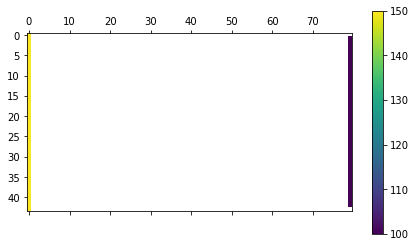

In [20]:
delt_x = 1
delt_y = 1

#set node array
node = np.zeros( (80, 44), dtype = int )
node[0,:] = 1 #left side open to seepage
node[-1,1:-1] = 1 #right side with constant flux


#hydraulic conductivity values
K = np.ones_like(node, dtype = float)
K[0:8,:]=5
K[8:26,:]=0.5
K[27:41,:]

#h values
h = np.ones_like(node, dtype = float)*100
qx = np.zeros_like(h)
qx[1:-1,:] = -K[1:-1,:]*(h[2:,:] - h[0:-2,:])/(2*1)
qy = np.zeros_like(h)
qx[:,1:-1] = -K[:,1:-1]*(h[:,2:] - h[:,0:-2])/(2*1)
qx[0,:] = -K[0,:]*(h[1,:] - h[0,:])/1
qy[43:,0] = -K[43:,0]*(h[43:,1] - h[43:,0])/1

#head
h = GaussSeidel(h, node, qx, qy, K, delt_x, delt_y, 0.0001)
h[0,:] = 150

#Graph
plt.matshow(np.transpose(h))
plt.colorbar()



C:\Users\SFU\Desktop\Python\python-3.7.6.amd64\lib\site-packages\matplotlib\quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\SFU\Desktop\Python\python-3.7.6.amd64\lib\site-packages\matplotlib\quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\SFU\Desktop\Python\python-3.7.6.amd64\lib\site-packages\matplotlib\quiver.py:767: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
C:\Users\SFU\Desktop\Python\python-3.7.6.amd64\lib\site-packages\matplotlib\quiver.py:780: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


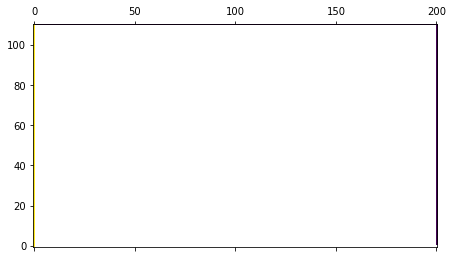

In [27]:
Spc = 10
plt.matshow(np.transpose(h), origin = 'lower')
plt.quiver(np.linspace(0, 200, 201)[::Spc], np.linspace(0, 110, 111)[::Spc], np.transpose(qx[::Spc, ::Spc]), np.transpose(qy[::Spc, ::Spc]))